Data Visualization and Exploration
CPSC 5530
CRN 21428
Hunter Harris: zgt795
Assignment 2: 6 Dimensions

Import Libraries

In [41]:
import pandas as pd

Read Data

In [42]:
pok_df = pd.read_csv("PokemonDb.csv")

Inspect Dataset

In [43]:
print(pok_df)
print(pok_df.value_counts("Type1"))

             Name       Variation   Type1   Type2  Total   HP  Attack  \
0       Bulbasaur             NaN   Grass  Poison    318   45      49   
1         Ivysaur             NaN   Grass  Poison    405   60      62   
2        Venusaur             NaN   Grass  Poison    525   80      82   
3        Venusaur           Mega    Grass  Poison    625   80     100   
4      Charmander             NaN    Fire     NaN    309   39      52   
...           ...             ...     ...     ...    ...  ...     ...   
1066     Basculin  White-Striped    Water     NaN    460   70      92   
1067  Basculegion           Male    Water   Ghost    530  120     112   
1068  Basculegion         Female    Water   Ghost    530  120      92   
1069      Kleavor             NaN     Bug    Rock    505   70     135   
1070     Ursaluna             NaN  Normal  Ground    550  130     140   

      Defense  Sp.Atk  Sp.Def  Speed  
0          49      65      65     45  
1          63      80      80     60  
2     

Data Cleaning

In [44]:
# Replace misspelled Electric
pok_df['Type1'].replace("Eletric", "Electric", inplace=True)

# Rename columns
pok_df.rename(columns={"Type1": "Type"}, inplace=True)

# Remove unnecessary columns. 6 attributes remain
pok_df.drop(columns={"Name","Variation", "Total", "Type2", "Speed"}, index=1, inplace=True)

# Check for null values
null_counts = pok_df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)
print(null_counts)

# Filter Fairy and Steel type Pokemon only
types = ['Fairy', 'Steel']
pok_df = pok_df[pok_df['Type'].isin(types)]
pok_df.reset_index(drop=True, inplace=True)

Type       0
HP         0
Attack     0
Defense    0
Sp.Atk     0
Sp.Def     0
dtype: int64


Visualize Data

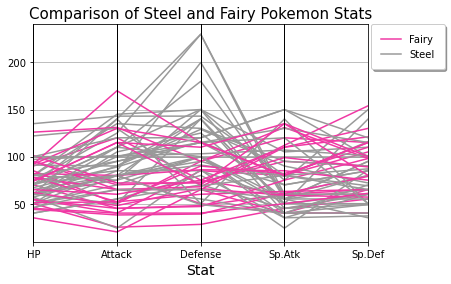

In [45]:
# Create plot
ax = pd.plotting.parallel_coordinates(pok_df, "Type", color=('#f038a4', '#999999'))
fig = ax.get_figure()

# Adjust legend and axis labels
ax.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, fontsize=10, shadow=True, borderpad=1)
ax.set_title("Comparison of Steel and Fairy Pokemon Stats", fontsize = 15)
ax.set_xlabel(xlabel = 'Stat', fontsize = 14)
fig.patch.set_facecolor("white")

# Save figure
fig.savefig("Fairy_Steel_Pokemon", dpi=1200, bbox_inches = 'tight')